<a href="https://colab.research.google.com/github/Arshiya-Begum30/FMML_Poject_and_labs/blob/main/Perceptron_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the required libraries

import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(42)
np.random.seed(42)

.**1.Changing the coefficients array and trying a different polynomial x3 instead of our x2**

In [ ]:
def eval_3rd_degree(coeffs, x):


    a = coeffs[0] * (x * x * x)
    b = coeffs[1] * (x * x)
    c = coeffs[2] * x
    d = coeffs[3]
    y = a + b + c + d
    return y

hundred_xs = np.random.uniform(-10, 10, 100 )
coeffs = [1, 2, -3, 1]

xs = []
ys = []
for x in hundred_xs:
    y  = eval_3rd_degree(coeffs, x)
    xs.append(x)
    ys.append(y)

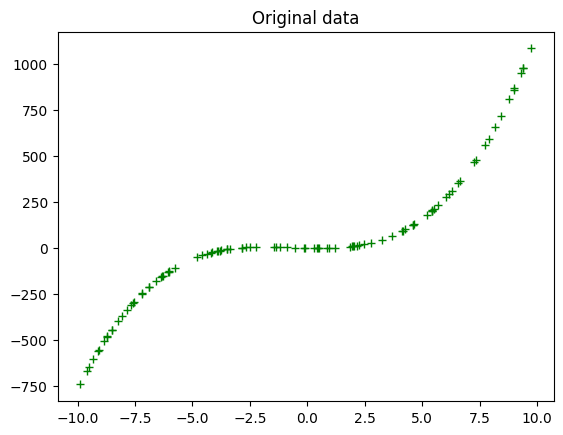

In [ ]:
plt.plot(xs, ys, 'g+')
plt.title('Original data')
plt.show()

In [ ]:
def eval_3rd_degree_jitter(coeffs, x, j):


    a = coeffs[0] * (x * x * x)
    b = coeffs[1] * (x * x)
    c = coeffs[2] * x
    d = coeffs[3]
    y = a + b + c

    interval = [y - j, y + j]
    interval_min = interval[0]
    interval_max = interval[1]
    jit_val = random.random() * interval_max      # Generate a random number in range 0 to interval max

    while interval_min > jit_val:                 # While the random jitter value is less than the interval min,
        jit_val = random.random() * interval_max  # it is not in the right range. Re-roll the generator until it
                                                  # give a number greater than the interval min.

    return jit_val

xs = []
ys = []
for x in hundred_xs:
    y  = eval_3rd_degree_jitter(coeffs, x, 0.1)
    xs.append(x)
    ys.append(y)


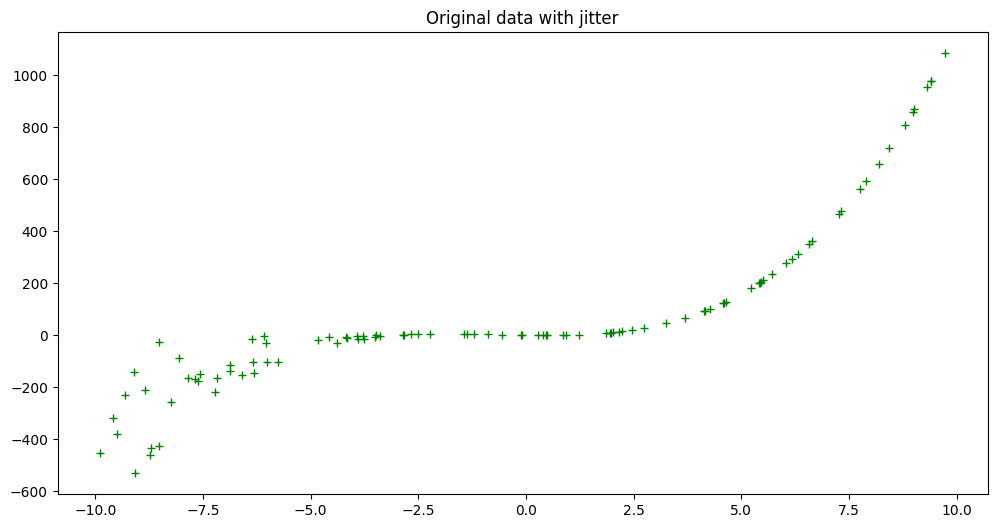

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+')
plt.title('Original data with jitter')
plt.show()

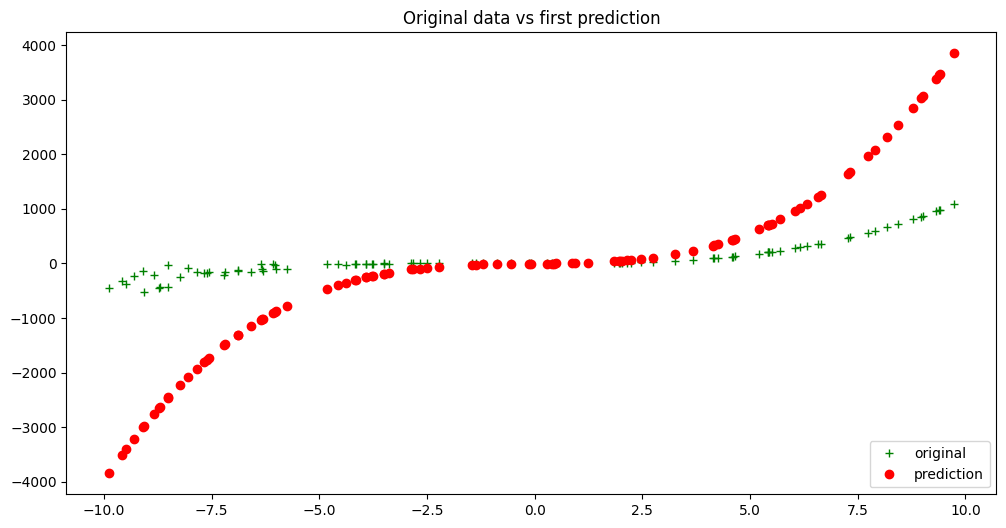

In [ ]:
def loss_mse(ys, y_bar):
   return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
rand_coeffs = (random.randrange(-10, 10), random.randrange(-10, 10), random.randrange(-10, 10), random.randrange(-10, 10) )
y_bar = eval_3rd_degree(rand_coeffs, hundred_xs)
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, y_bar, 'ro', label = 'prediction')
plt.title('Original data vs first prediction')
plt.legend(loc="lower right")
plt.show()

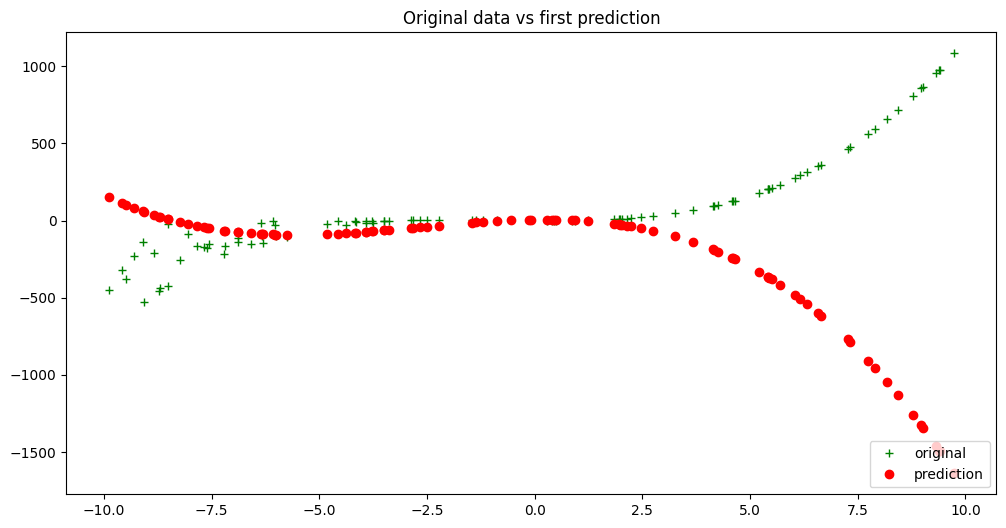

In [ ]:
rand_coeffs = (random.randrange(-10, 10), random.randrange(-10, 10), random.randrange(-10, 10), random.randrange(-10, 10) )
y_bar = eval_3rd_degree(rand_coeffs, hundred_xs)
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, y_bar, 'ro', label = 'prediction')
plt.title('Original data vs first prediction')
plt.legend(loc="lower right")
plt.show()

In [ ]:
initial_model_loss = loss_mse(ys, y_bar)
initial_model_loss

621463.1662052203

In [ ]:
def calc_gradient_3rd_poly(rand_coeffs, hundred_xs, ys):


    a_s = []
    b_s = []
    c_s = []
    d_s = []

    y_bars = eval_3rd_degree(rand_coeffs, hundred_xs)

    for x, y, y_bar in list(zip(hundred_xs, ys, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_cubic = x ** 3
        partial_a = x_cubic * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x_cubic * (y - y_bar)
        b_s.append(partial_b)
        partial_c = x_cubic * (y - y_bar)
        c_s.append(partial_c)
        partial_d = (y - y_bar)
        d_s.append(partial_d)


    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)
    gradient_d = (-2 / n) * sum(d_s)

    return (gradient_a, gradient_b, gradient_c, gradient_d)   # return calculated gradients as a a tuple of its 3 parts

In [ ]:
calc_grad = calc_gradient_3rd_poly(rand_coeffs, hundred_xs, ys)

lr = 0.0001
a_new = rand_coeffs[0] - lr * calc_grad[0]
b_new = rand_coeffs[1] - lr * calc_grad[1]
c_new = rand_coeffs[2] - lr * calc_grad[2]
d_new = rand_coeffs[3] - lr * calc_grad[3]

new_model_coeffs = (a_new, b_new, c_new, d_new )
print(f"New model coeffs: {new_model_coeffs}")

# update with these new coeffs:
new_y_bar = eval_3rd_degree(new_model_coeffs, hundred_xs)
updated_model_loss = loss_mse(ys, new_y_bar)

print(f"Now have smaller model loss: {updated_model_loss} vs {initial_model_loss}")

New model coeffs: (45.51807874906148, 38.51807874906148, 50.51807874906148, 5.063620854538512)
Now have smaller model loss: 305478422.0700289 vs 621463.1662052203


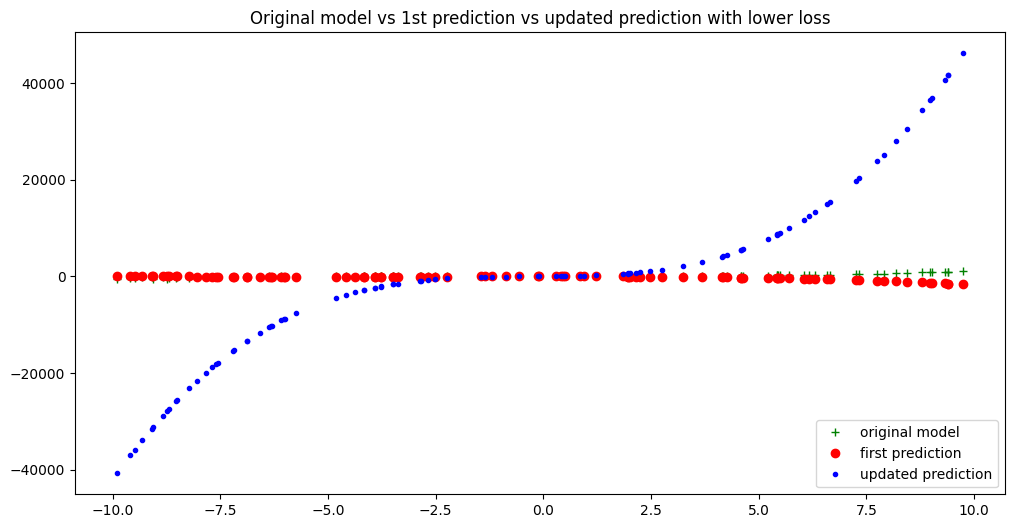

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original model')
plt.plot(xs, y_bar, 'ro', label = 'first prediction')
plt.plot(xs, new_y_bar, 'b.', label = 'updated prediction')
plt.title('Original model vs 1st prediction vs updated prediction with lower loss')
plt.legend(loc="lower right")
plt.show()

**2.Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?**

In [ ]:
def calc_gradient_3rd_poly_for_GD(coeffs, inputs_x, outputs_y, lr):
    """
    calculates the gradient for a third degree polynomial.

    Args:
        coeffs: a,b,c and d, for a 3rd degree polynomial [ y = ax^3 + bx^2 + cx + d ]
        inputs_x: x input datapoints
        outputs_y: actual y output points
        lr: learning rate

    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.

    """
    a_s = []
    b_s = []
    c_s = []
    d_s = []

    y_bars = eval_3rd_degree(coeffs, inputs_x)

    for x,y,y_bar in list(zip(inputs_x, outputs_y, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_cubic = x **3
        partial_a = x_cubic* (y - y_bar)
        a_s.append(partial_a)
        partial_b = x_cubic * (y - y_bar)
        b_s.append(partial_b)
        partial_c = x_cubic * (y - y_bar)
        c_s.append(partial_c)
        partial_d = x_cubic * (y - y_bar)
        d_s.append(partial_d)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)
    gradient_d = (-2 / n) * sum(d_s)

    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c
    d_new = coeffs[2] - lr * gradient_d


    new_model_coeffs = (a_new, b_new, c_new, d_new)

    # update with these new coeffs:
    new_y_bar = eval_3rd_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar

In [ ]:
def gradient_descent(epochs, lr):
    """
    Perform gradient descent for a third degree polynomial.

    Args:
        epochs: number of iterations to perform of finding new coefficients and updatingt loss.
        lr: specified learning rate

    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)

    """
    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        loss = calc_gradient_3rd_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    print(losses)
    return loss[0], loss[1], loss[2], losses  # (updated_model_loss, new_model_coeffs, new_y_bar, saved loss updates)

In [ ]:
GD = gradient_descent(30000, 0.00001)


<ipython-input-6-3e15a3826a00>:12: RuntimeWarning: overflow encountered in double_scalars
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
<ipython-input-6-3e15a3826a00>:12: RuntimeWarning: overflow encountered in multiply
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
<ipython-input-26-4dfc5077e9fb>:35: RuntimeWarning: overflow encountered in double_scalars
  gradient_a = (-2 / n) * sum(a_s)
<ipython-input-26-4dfc5077e9fb>:36: RuntimeWarning: overflow encountered in double_scalars
  gradient_b = (-2 / n) * sum(b_s)
<ipython-input-26-4dfc5077e9fb>:37: RuntimeWarning: overflow encountered in double_scalars
  gradient_c = (-2 / n) * sum(c_s)
<ipython-input-26-4dfc5077e9fb>:38: RuntimeWarning: overflow encountered in double_scalars
  gradient_d = (-2 / n) * sum(d_s)
<ipython-input-2-3d54c7d24e89>:19: RuntimeWarning: invalid value encountered in add
  y = a + b + c +d


[1533843.2210219863, 6347706.723768655, 23451956.069155585, 96963100.77767946, 383909714.29315066, 1558542911.0114312, 6253951090.916173, 25246380237.35402, 101617007701.80952, 409614805965.0982, 1649933538040.1213, 6648386276651.777, 26784707944333.89, 107918779780868.72, 434797955671448.6, 1751813014449051.0, 7058023947119726.0, 2.843681390299305e+16, 1.1457174665221523e+17, 4.6160949674631046e+17, 1.859823091939844e+18, 7.493223492084871e+18, 3.019017717695738e+19, 1.216361525703706e+20, 4.900717506558195e+20, 1.9744978841719527e+21, 7.955247059543372e+21, 3.205167076608107e+22, 1.2913610206088631e+23, 5.202890357570447e+23, 2.0962432366512573e+24, 8.445758812192813e+24, 3.4027941345274997e+25, 1.3709849144864732e+26, 5.523694826560647e+26, 2.2254952782621554e+27, 8.966514966942369e+27, 3.612606660553415e+28, 1.4555183292459364e+29, 5.864279745442742e+29, 2.3627168577537106e+30, 9.519380371056634e+30, 3.8353559950047443e+31, 1.5452639809566881e+32, 6.2258647540202365e+32, 2.50839936

If the learning rate is too small, the algorithm may take tiny steps, and convergence can be very slow. You might need a large number of iterations to reach the minimum.

In [ ]:
GD_large_lr = gradient_descent(30000, 0.01)

<ipython-input-6-3e15a3826a00>:12: RuntimeWarning: overflow encountered in multiply
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
<ipython-input-26-4dfc5077e9fb>:23: RuntimeWarning: overflow encountered in double_scalars
  partial_a = x_cubic* (y - y_bar)
<ipython-input-26-4dfc5077e9fb>:25: RuntimeWarning: overflow encountered in double_scalars
  partial_b = x_cubic * (y - y_bar)
<ipython-input-26-4dfc5077e9fb>:27: RuntimeWarning: overflow encountered in double_scalars
  partial_c = x_cubic * (y - y_bar)
<ipython-input-26-4dfc5077e9fb>:29: RuntimeWarning: overflow encountered in double_scalars
  partial_d = x_cubic * (y - y_bar)
<ipython-input-2-3d54c7d24e89>:19: RuntimeWarning: invalid value encountered in add
  y = a + b + c +d


[3283084164097.339, 2.9672437543777624e+19, 2.6816336233921114e+26, 2.4235147575190905e+33, 2.190240951873898e+40, 1.9794207616776594e+47, 1.78889292906717e+54, 1.6167042266214488e+61, 1.4610894335294885e+68, 1.3204532391387013e+75, 1.1933538883653127e+82, 1.0784884013049276e+89, 9.746792155196771e+95, 8.808621140631577e+102, 7.96075315485324e+109, 7.194496139717275e+116, 6.501994685371068e+123, 5.87614949922747e+130, 5.3105446263988595e+137, 4.799381675480082e+144, 4.3374203753850514e+151, 3.9199248538455687e+158, 3.542615086837676e+165, 3.201623021211205e+172, 2.8934529207065427e+179, 2.614945528839303e+186, 2.3632456812626946e+193, 2.135773035580503e+200, 1.9301956185425054e+207, 1.7444059194370592e+214, 1.5764992845983113e+221, 1.4247543915357958e+228, 1.287615602513739e+235, 1.1636770166748878e+242, 1.0516680572165714e+249, 9.504404458635764e+255, 8.589564311045046e+262, 7.762781495114209e+269, 7.015580110786313e+276, 6.340300100142959e+283, 5.730018719060307e+290, 5.1784795675588

If the learning rate is too large, the algorithm may overshoot the minimum and oscillate or even diverge. The loss might increase rather than decrease.
python


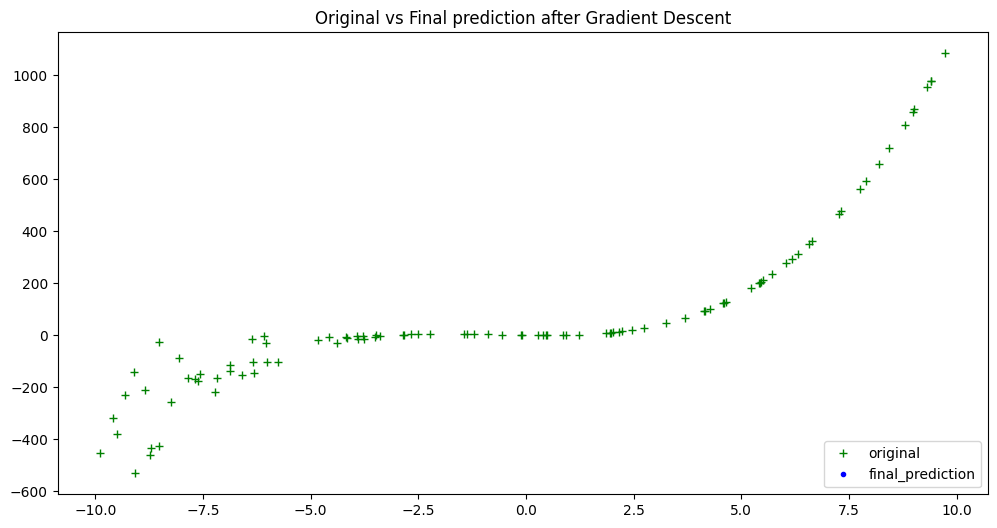

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, GD[2], 'b.', label = 'final_prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc = "lower right")
plt.show()

In [ ]:
print(f"Final Coefficients predicted: {GD[1]}")
print(f"Original Coefficients: {coeffs}")

Final Coefficients predicted: (nan, nan, nan, nan)
Original Coefficients: [1, 2, -3, 1]


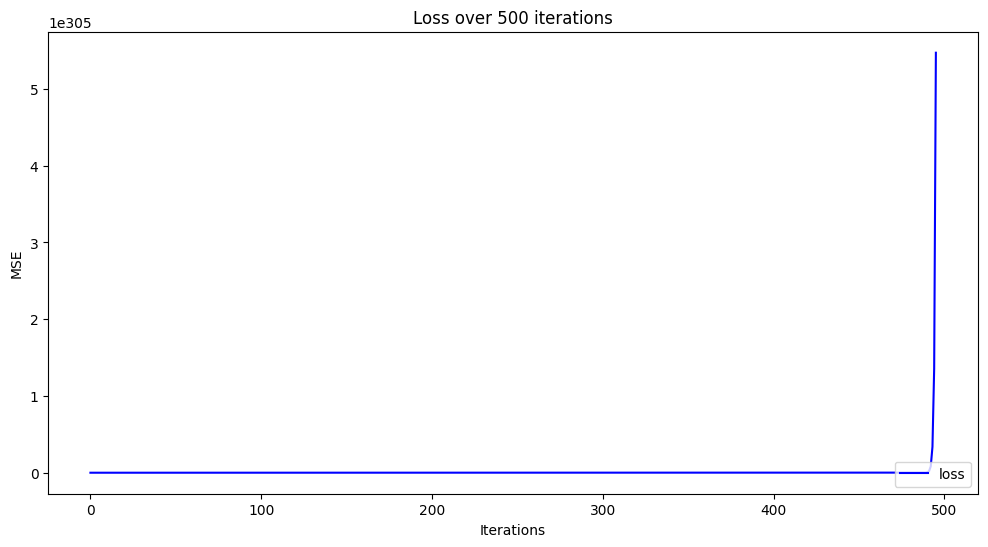

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(GD[3], 'b-', label = 'loss')
# plt.xlim(0,50)
plt.title('Loss over 500 iterations')
plt.legend(loc="lower right")
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

We observe that the model loss reached close to 500, it indicates that the current set of coefficients for your third-degree polynomial model is not performing well in terms of minimizing the Mean Squared Error (MSE) loss.

**3.Take a degree 5 polynomial with 5 roots and try different initializations, instead of random ones. Does it converge on different values for different initializations? Why does initialization not matter in our case of x2 ?**

In [ ]:
def eval_5th_degree(coeffs, x):
    a = coeffs[0] * (x ** 5)
    b = coeffs[1] * (x ** 4)
    c = coeffs[2] * (x ** 3)
    d = coeffs[3] * (x ** 2)
    e = coeffs[4] * x
    f = coeffs[5]
    y = a + b + c + d + e + f
    return y

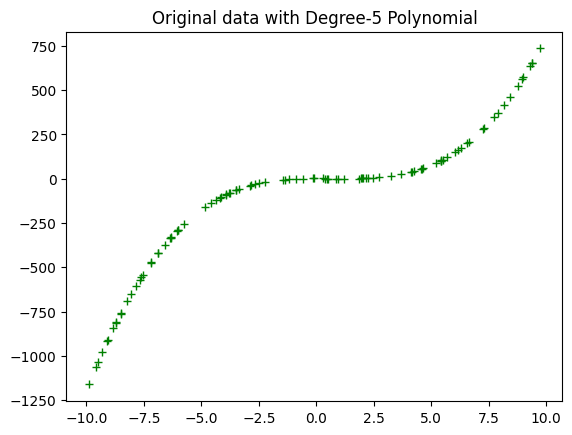

In [ ]:
# Change to a degree-5 polynomial: y = ax^5 + bx^4 + cx^3 + dx^2 + ex + f
coeffs_degree_5 = [1, -2, 0, 1, 0, -1]

# Update the original data and plot
ys_degree_5 = [eval_3rd_degree(coeffs_degree_5, x) for x in xs]
plt.plot(xs, ys_degree_5, 'g+', label='Degree-5 polynomial')
plt.title('Original data with Degree-5 Polynomial')
plt.show()


In [ ]:
def calc_gradient_5th_poly_for_GD(coeffs, inputs_x, outputs_y, lr):
    """
    Calculates the gradient for a fifth-degree polynomial.

    Args:
        coeffs: a, b, c, d, and e for a 5th degree polynomial [ y = ax^5 + bx^4 + cx^3 + dx^2 + ex + f ]
        inputs_x: x input datapoints
        outputs_y: actual y output points
        lr: learning rate

    Returns: Calculated gradients for the 5th degree polynomial, as a tuple of its parts for a, b, c, d, e respectively.

    """
    a_s = []
    b_s = []
    c_s = []
    d_s = []
    e_s = []

    y_bars = eval_5th_degree(coeffs, inputs_x)

    for x, y, y_bar in zip(inputs_x, outputs_y, y_bars):
        x_5th = x ** 5
        x_4th = x ** 4
        x_3rd = x ** 3
        x_2nd = x ** 2

        partial_a = x_5th * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x_4th * (y - y_bar)
        b_s.append(partial_b)
        partial_c = x_3rd * (y - y_bar)
        c_s.append(partial_c)
        partial_d = x_2nd * (y - y_bar)
        d_s.append(partial_d)
        partial_e = x * (y - y_bar)
        e_s.append(partial_e)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)
    gradient_d = (-2 / n) * sum(d_s)
    gradient_e = (-2 / n) * sum(e_s)

    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c
    d_new = coeffs[3] - lr * gradient_d
    e_new = coeffs[4] - lr * gradient_e

    new_model_coeffs = (a_new, b_new, c_new, d_new, e_new)
    new_y_bar = eval_5th_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar


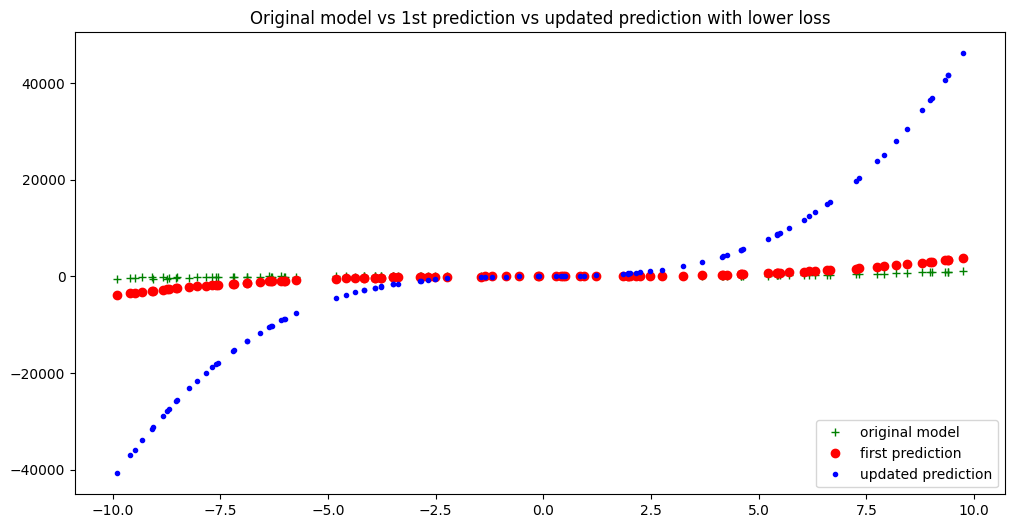

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original model')
plt.plot(xs, y_bar, 'ro', label = 'first prediction')
plt.plot(xs, new_y_bar, 'b.', label = 'updated prediction')
plt.title('Original model vs 1st prediction vs updated prediction with lower loss')
plt.legend(loc="lower right")
plt.show()

**4.Can you modify the algorithm to find a maxima of a function, instead of a minima?**

In [ ]:
def eval_5th_degree(coeffs, x):
    """
    Function to return the output of evaluating a fifth-degree polynomial,
    given a specific x value.

    Args:
        coeffs: List containing the coefficients a, b, c, d, and e for the polynomial.
        x: The input x value to the polynomial.

    Returns:
        y: The corresponding output y value for the fifth-degree polynomial.

    """
    a = coeffs[0] * (x ** 5)
    b = coeffs[1] * (x ** 4)
    c = coeffs[2] * (x ** 3)
    d = coeffs[3] * (x ** 2)
    e = coeffs[4] * x
    f = coeffs[5]
    y = a + b + c + d + e + f
    return y

def calc_gradient_5th_poly_for_GD(coeffs, inputs_x, outputs_y, lr):
    """
    Calculates the gradient for a fifth-degree polynomial.

    Args:
        coeffs: a, b, c, d, and e for a 5th degree polynomial [ y = ax^5 + bx^4 + cx^3 + dx^2 + ex + f ]
        inputs_x: x input datapoints
        outputs_y: actual y output points
        lr: learning rate

    Returns: Calculated gradients for the 5th degree polynomial, as a tuple of its parts for a, b, c, d, e respectively.

    """
    a_s = []
    b_s = []
    c_s = []
    d_s = []
    e_s = []

    y_bars = eval_5th_degree(coeffs, inputs_x)

    for x, y, y_bar in zip(inputs_x, outputs_y, y_bars):
        x_5th = x ** 5
        x_4th = x ** 4
        x_3rd = x ** 3
        x_2nd = x ** 2

        partial_a = x_5th * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x_4th * (y - y_bar)
        b_s.append(partial_b)
        partial_c = x_3rd * (y - y_bar)
        c_s.append(partial_c)
        partial_d = x_2nd * (y - y_bar)
        d_s.append(partial_d)
        partial_e = x * (y - y_bar)
        e_s.append(partial_e)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)
    gradient_d = (-2 / n) * sum(d_s)
    gradient_e = (-2 / n) * sum(e_s)

    a_new = coeffs[0] + lr * gradient_a
    b_new = coeffs[1] + lr * gradient_b
    c_new = coeffs[2] + lr * gradient_c
    d_new = coeffs[3] + lr * gradient_d
    e_new = coeffs[4] + lr * gradient_e

    new_model_coeffs = (a_new, b_new, c_new, d_new, e_new)
    new_y_bar = eval_5th_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar


To modify the algorithm to find a maximum instead of a minimum, you would change the sign of the gradients in the gradient descent update.